# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
# shape of df
print(df.shape)

(614, 13)


In [3]:
assert df.shape == (614, 13)

In [4]:
# head of df
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [5]:
# your code here
df.drop("Loan_ID",axis=1,inplace=True)

df["Loan_Status"] = pd.Categorical(df["Loan_Status"]).codes

In [6]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [7]:
def make_stats(df):
    stats = pd.DataFrame(index = df.columns, columns =["type","#null","#unique","unique values"])

    for col in df.columns:
        if len(df[col].unique()) < 10:
            uni = pd.Series(df[col].dropna().unique()).astype('str').str.cat(sep="-")
            stats.loc[col] = [df[col].dtype, df[col].isnull().sum(),len(df[col].unique()), uni  ]
        else:
            uni = pd.Series(df[col].dropna().unique()).astype('str').str.cat(sep="-")
            stats.loc[col] = [df[col].dtype, df[col].isnull().sum(),len(df[col].unique()), uni[:20] +"-..."  ]
    
    return stats

In [8]:

stats = make_stats(df)
stats

,type,#null,#unique,unique values
Gender,object,13,3,Male-Female
Married,object,3,3,No-Yes
Dependents,object,15,5,0-1-2-3+
Education,object,0,2,Graduate-Not Graduate
Self_Employed,object,32,3,No-Yes
ApplicantIncome,int64,0,505,5849-4583-3000-2583--...
CoapplicantIncome,float64,0,287,0.0-1508.0-2358.0-41-...
LoanAmount,float64,22,204,128.0-66.0-120.0-141-...
Loan_Amount_Term,float64,14,11,360.0-120.0-240.0-18-...
Credit_History,float64,50,3,1.0-0.0


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [9]:
# your code here
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df = df.dropna() #drops all rows with null values
print(df.shape)

(480, 12)


In [10]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

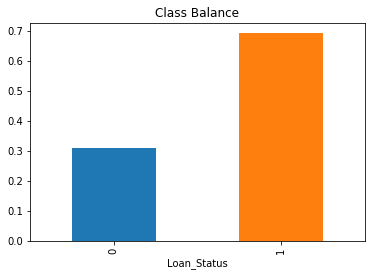

In [11]:
(df.groupby('Loan_Status').size()/len(df["Loan_Status"])).plot(kind="bar",title="Class Balance")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [12]:
aproved = df["Loan_Status"].sum() #sum boolean vals
not_aproved = len(df["Loan_Status"])- aproved

print("number of approved =",aproved)
print("number not approved =",not_aproved)

number of approved = 332
number not approved = 148


In [13]:
naive_accuracy = aproved/len(df["Loan_Status"])
print("max accuracy using naive approach =",naive_accuracy)

max accuracy using naive approach = 0.6916666666666667


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [14]:
def make_bar_plot(df, column):
    # your code here
    total= df.groupby(column).size()
    approved = df.groupby(column).sum()['Loan_Status']
    (approved/total).plot(kind='barh',title="Approval rate by "+str(column))
    #len(df.groupby(column))/len(df["Loan_Status"])).plot(kind='barh',title="Approval rate by "+str(column))

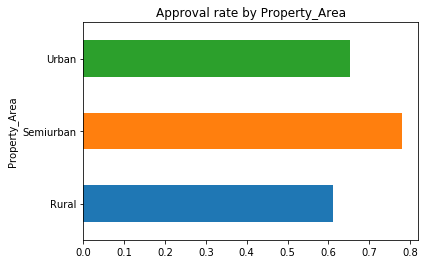

In [15]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [16]:
def make_box_plot(df, column):  
    # your code here
    df.boxplot(column =column,by="Loan_Status")

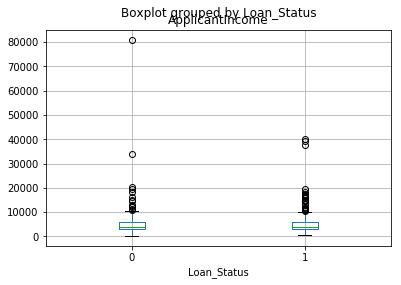

In [17]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************
****************** Married *******************
****************** Dependents *******************
****************** Education *******************
****************** Self_Employed *******************
****************** ApplicantIncome *******************
****************** CoapplicantIncome *******************
****************** LoanAmount *******************
****************** Loan_Amount_Term *******************
****************** Credit_History *******************
****************** Property_Area *******************
****************** Loan_Status *******************


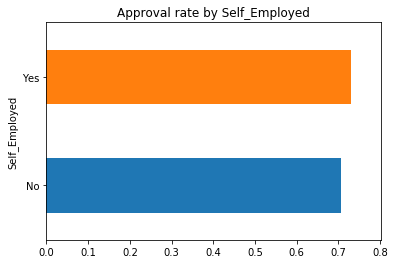

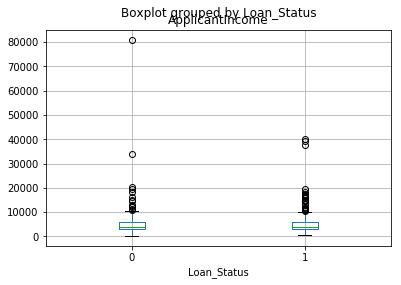

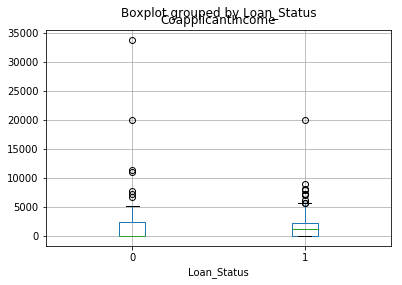

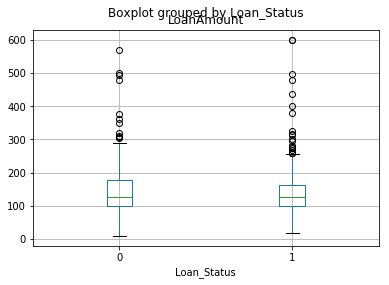

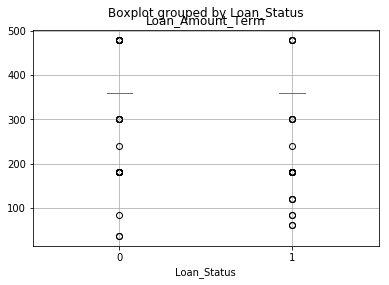

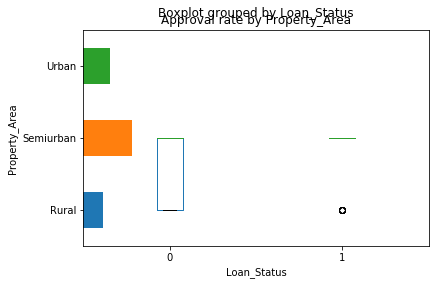

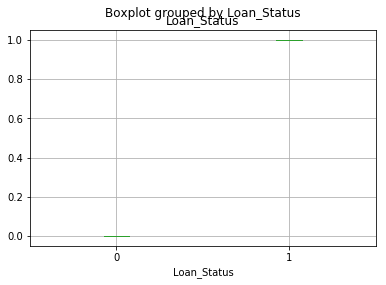

In [18]:
for col in df.columns:
    print(f'****************** {col} *******************')
    if df[col].dtype == object:
        make_bar_plot(df,col)
    else:
        make_box_plot(df,col)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [19]:
# your code here
df = pd.get_dummies(df,columns=["Property_Area","Dependents"])

print the head of df

In [20]:
# your code here
print(df.head())

  Gender Married     Education Self_Employed  ApplicantIncome  \
1   Male     Yes      Graduate            No             4583   
2   Male     Yes      Graduate           Yes             3000   
3   Male     Yes  Not Graduate            No             2583   
4   Male      No      Graduate            No             6000   
5   Male     Yes      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Loan_Status  Property_Area_Rural  Property_Area_Semiurban  \
1            0                    1                        0   
2            1                    0                        0

In [21]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [22]:
# your code here
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.Categorical(df[col]).codes

Print the head of df

In [23]:
print(df.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
1       1        1          0              0             4583   
2       1        1          0              1             3000   
3       1        1          1              0             2583   
4       1        0          0              0             6000   
5       1        1          0              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Loan_Status  Property_Area_Rural  Property_Area_Semiurban  \
1            0                    1                        0   
2            1                    0                        0

In [24]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [25]:
y = df.Loan_Status
X = df.drop("Loan_Status",axis=1)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [27]:
from sklearn.linear_model import LogisticRegression

lReg = LogisticRegression(random_state=123)
lReg.fit(X_train,y_train)

train_score = lReg.score(X_train,y_train)
test_score = lReg.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8035714285714286
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [28]:
from sklearn import metrics
y_pred = lReg.predict(X_test)
conf_matrix =metrics.confusion_matrix(y_test, y_pred)
print (conf_matrix)
#print (metrics.classification_report(y_test, y_pred))


[[22 25]
 [ 4 93]]
              precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.79      0.96      0.87        97

   micro avg       0.80      0.80      0.80       144
   macro avg       0.82      0.71      0.73       144
weighted avg       0.81      0.80      0.78       144



In [29]:
precision_0 = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][0]) # TN/(TN+FN)
recall_1 = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0]) # TP/(FN+TP)
print ('precision_0 =', precision_0)
print ('recall_1 =',recall_1)

precision_0 = 0.8461538461538461
recall_1 = 0.9587628865979382


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123,C=2)
scores = cross_val_score(clf, df.drop("Loan_Status",axis=1), df["Loan_Status"], scoring='f1', cv=5)
print (scores)
print ('scores mean =', scores.mean() , 'scores std =', scores.std())

[0.87417219 0.86092715 0.85333333 0.91428571 0.85915493]
scores mean = 0.8723746629889714 scores std = 0.02203699795714741


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.